In [466]:
'''                                       Hotel Booking Cancellation Prediction
Project Description
Here in the given dataset we are having 32 columns & 119390 rows, where the column names are as follows ['hotel', 'is_canceled', 'lead_time', 
'arrival_date_year','arrival_date_month', 'arrival_date_week_number','arrival_date_day_of_month', 'stays_in_weekend_nights','stays_in_week_nights',
'adults', 'children', 'babies', 'meal','country', 'market_segment', 'distribution_channel','is_repeated_guest', 'previous_cancellations',
'previous_bookings_not_canceled', 'reserved_room_type','assigned_room_type', 'booking_changes', 'deposit_type', 'agent','days_in_waiting_list',
'customer_type', 'adr','required_car_parking_spaces', 'total_of_special_requests','reservation_status'].

here on the basis of given column we need to find some insights for the client like, BOOKING TRENDS | CUSTOMER DEMOGRAPHY | CANCELLATION PATTERN |
FACTORS AFFECTING CANCELLATION etc.

On the basis of given Data we need to predict BOOKING CANCELLATION (YES/NO)
 
1. Problem Statement: 
a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will BOOKING CANCELLATION.


   [PERFORMED ACTIONS]                                                                    
   
* IMPORTING LIBRARIES
* IMPORTING PROJECT FILE (.csv)
* Summary of DataSet
                   - Number of Rows Present
                   - Number of columns present
                   - Data type of columns
                   - Checking Missing / Null values 
                   - Checking Null values with HeatMap
* Data Cleaning 
                - Handling Missing Values
                - Droping Non required columns
                - Converting Data Types
                
* Exploratory Data Analysis EDA 
                   - Booking Trends
                   - sesonality in bookings
                   - Cancellation Patterns
                   - Factors affecting cancellation
                   - Meal wise distribution of customers
                   - Top 10 countries , customer wise
                   - Market segmentwise booking of customers
                   - Wattage of distribution channel in bookings
                   - Month wise Wattage of distribution channel in bookings
                   - Encoding columns

* Model Building
                   - Applying Train Test Split
                   - Importing Important required Sklearn Libraries
                   - Importing Logistic Regression & RandomForest
                   
* Applying Logistic Regression  [ 98% accuracy ]
                   - Training Model
                   - Preduction of Logistic regression
                         Validation Accuracy | Test Accuracy  | Classification Report

* Applying Random Forest Classifier [ 100 % accuracy ]
                   - Training Model
                   - Evaluating Model  Accuracy Score | Confusion MAtrix | Classification Report
'''

"                                       Hotel Booking Cancellation Prediction\nProject Description\nHere in the given dataset we are having 32 columns & 119390 rows, where the column names are as follows ['hotel', 'is_canceled', 'lead_time', \n'arrival_date_year','arrival_date_month', 'arrival_date_week_number','arrival_date_day_of_month', 'stays_in_weekend_nights','stays_in_week_nights',\n'adults', 'children', 'babies', 'meal','country', 'market_segment', 'distribution_channel','is_repeated_guest', 'previous_cancellations',\n'previous_bookings_not_canceled', 'reserved_room_type','assigned_room_type', 'booking_changes', 'deposit_type', 'agent','days_in_waiting_list',\n'customer_type', 'adr','required_car_parking_spaces', 'total_of_special_requests','reservation_status'].\n\nhere on the basis of given column we need to find some insights for the client like, BOOKING TRENDS | CUSTOMER DEMOGRAPHY | CANCELLATION PATTERN |\nFACTORS AFFECTING CANCELLATION etc.\n\nOn the basis of given Data w

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv ('hotel_bookings.csv')
df
# df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


## SUMMARY of Dataset

In [5]:
pd.set_option('display.max_columns', None)
df.head(5)

# here below we can see the all 32 columns in the details.

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


In [9]:
df.columns
# following are the column names, which are 32

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [11]:
df.shape
# there are 1,19,390 rows and 32 columns are present in our dataset.

(119390, 32)

In [13]:
df.dtypes
# here below we find that there are 3 types of data is present inside our dataset i.e = 'object' , 'int64' & 'float' 

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [15]:
df.info()

# there may presence of NULL VLAUES in our dataset.
# Total Number of colummns = 32
# Total number of rows = 1,19,390
# no. of columns with 'object' datatype is = 12
# no. of columns with 'float' datatype is = 4
# no. of columns with 'int64' datatype is = 16

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [27]:
# ======= CHECKING NULL VALUES =============

In [17]:
df.isnull().sum()

# here below we can find the presence of null vlaues in our dataset, 3 column is having NULL VALUE [Country + agent + company].


hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [41]:
# CHECKING NUL VALUES WITH THE HELP OF HEATMAP :-

<Axes: >

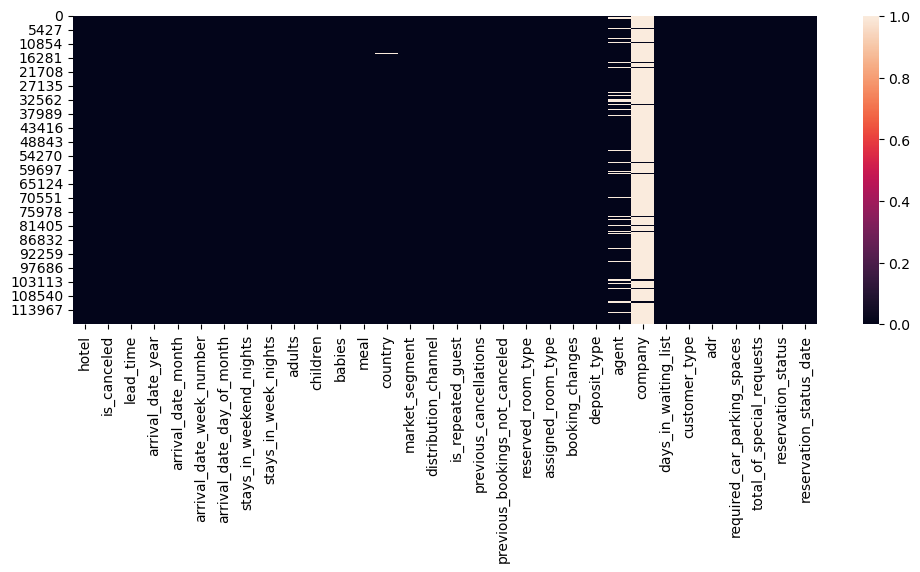

In [19]:
plt.figure(figsize=(12,4))
sns.heatmap(df.isnull())

# Here inthe heatmap also we can clearly find the presence of null values inside the dataframe.

In [45]:
'''So from above analysis we can find that there is a presence of NULL VALUES in our dataset. so we have to replace them with
the appropriate value. '''

'So from above analysis we can find that there is a presence of NULL VALUES in our dataset. so we have to replace them with\nthe appropriate value. '

=================================================================================================================================

## DATA CLEANING

=========== HANDLING MISSING VALUES =============

In [21]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
# From the above analysis we found that we are having NULL VLAUES in three columns "COUNTRY" "AGENT" & "COMPANY"

============ To Replace the Null-Values from the dataset, we have to import Simple IMputer Librarie.========

In [23]:
from sklearn.impute import SimpleImputer

In [25]:
imp = SimpleImputer(strategy="mean")
imp1 = SimpleImputer(strategy="most_frequent")
imp2 = SimpleImputer(strategy="median")

# Can only use these strategies: ['mean', 'median', 'most_frequent', 'constant']  got strategy=mostfrequent
# here for the 'flaot' datatype columns, we can replace the NULL VALUES with the MEAN of that column.
# and for 'string/object' datatype columns, we can replace the NULL VALUES with "MODE/ MOST FREQUENT" of that column.
#  we can replace the null values with the 'MEAN' values present in the columns.
#  so the null values can be replaced by the MEAN values ARRIVED in the column.

In [27]:
# Calculating the percentage of null values for each column
null_percentage = df[['children', 'country', 'agent', 'company']].isnull().mean() * 100
null_percentage

# Here from the below analysis we got the PERCENTAGE of NUll values in the column.
# Children ,agent & Country column having very less number of Null values.
# COMPANY Column having very Highest Number of Null Values = 95% approx.

children     0.003350
country      0.408744
agent       13.686238
company     94.306893
dtype: float64

In [75]:
''' From the above analysis we find that there no need to replace null values in "COMPANY CLOUMN" because if we replace it then it affects our rest
of the datset .
and we need to Replace Null Values from "CHILDREN" "COUNTRY" & "AGENT" columns only

The Children | Country & Agent column values should be replace with "MOST FREQUENT"
'''

' From the above analysis we find that there no need to replace null values in "COMPANY CLOUMN" because if we replace it then it affects our rest\nof the datset .\nand we need to Replace Null Values from "CHILDREN" "COUNTRY" & "AGENT" columns only\n\nThe Children | Country & Agent column values should be replace with "MOST FREQUENT"\n'

In [29]:
print(df['agent'].dtype)
print(df['country'].dtype)
print(df['children'].dtype)

# here children & agnet column are "float64" & Country column is "Object"

float64
object
float64


In [31]:
df.head(1)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01


In [33]:
float_nan_columns = ['agent','children']

In [35]:
for i in float_nan_columns:
    df[i]= imp1.fit_transform(df[i].values.reshape(-1,1))
    
# Here we are Replacing all Nan Values Column Together with their Mean of the columns, by using "FOR LOOP"

In [37]:
object_nan_columns = ['country']

In [39]:
for i in object_nan_columns:
    df[i] = imp1.fit_transform(df[i].values.reshape(-1, 1)).ravel()
    
# Here we are Replacing all Nan Values Column Together with their Mode/Most Frequent of the columns, by using "FOR LOOP"
# fit_transform returns a 2D array, and you're trying to assign it directly to a DataFrame column, which expects a 1D array. 
# To resolve this, we can use .ravel() to flatten the array after applying fit_transform.

In [41]:
df.isnull().sum()

# here below we can succesfully replaced all the null values with their appropriate substitues. except COMPANY COLUMN
# we nee to DROP the COMPANY COLUMN

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               0
babies                                 0
meal                                   0
country                                0
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                                  0
company         

================Droping COMPNAY COLUMN =================

In [43]:
df.drop(columns=['company'], inplace=True, axis=1)

In [45]:
df.drop(columns=['reservation_status_date'], inplace=True, axis=1)

In [47]:
df.isnull().sum()

# Now our Dataset is Clean with NO NULL Values

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

================= CONVERTING DATA TYPES ====================

In [49]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [51]:
df.head(1)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,9.0,0,Transient,0.0,0,0,Check-Out


## Exploratory Data Analysis EDA  /  Visualtization

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

============== BOOKING TRENDS  =============

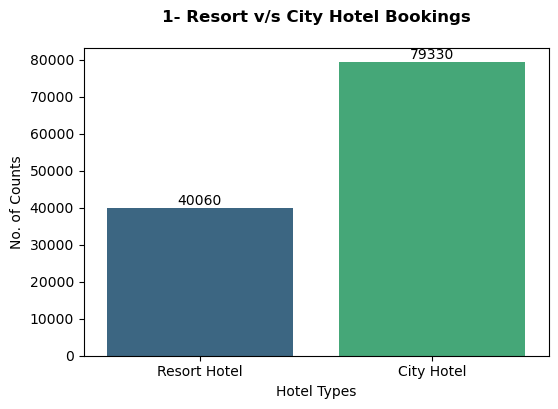

In [329]:
plt.figure(figsize=(6, 4), facecolor='white')
plt.title('1- Resort v/s City Hotel Bookings\n',weight='bold')

ax = sns.countplot(data=df, x='hotel', palette='viridis')
ax.bar_label(ax.containers[0])

plt.xlabel('Hotel Types', fontsize=10)
plt.ylabel('No. of Counts', fontsize=10)
plt.xticks(rotation=0, ha='center')
plt.show()


========= Seasonality in Bookings ==================

Text(0, 0.5, 'No. of Counts')

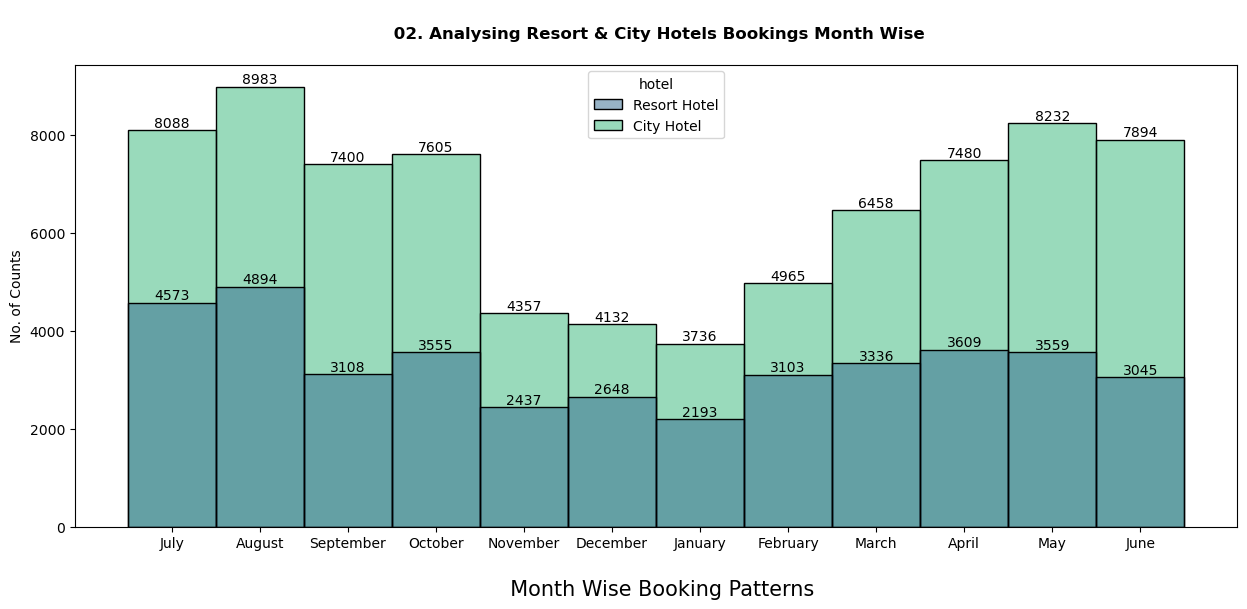

In [327]:
plt.figure (figsize = (15,6), facecolor = "white")

# plt.subplot(2,2,1)
plt.title('\n 02. Analysing Resort & City Hotels Bookings Month Wise\n',weight='bold')
ax=sns.histplot(data=df, x="arrival_date_month", hue="hotel",palette='viridis',bins=15)
# ax.bar_label(ax.containers[0])
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom',rotation=0, fontsize=10)
plt.xlabel('\n  Month Wise Booking Patterns', fontsize=15)
plt.ylabel('No. of Counts',fontsize=10)

In [458]:
# `reservation_status` vs `is_canceled` table

pd.crosstab(columns = df['reservation_status'], index = df['is_canceled'],
           margins=True, margins_name = 'Total')

reservation_status,0,1,2,Total
is_canceled,,,,
0,0,75166,0,75166
1,43017,0,1207,44224
Total,43017,75166,1207,119390


============== Cancellation Patterns and Factors Affecting cancellation ====================

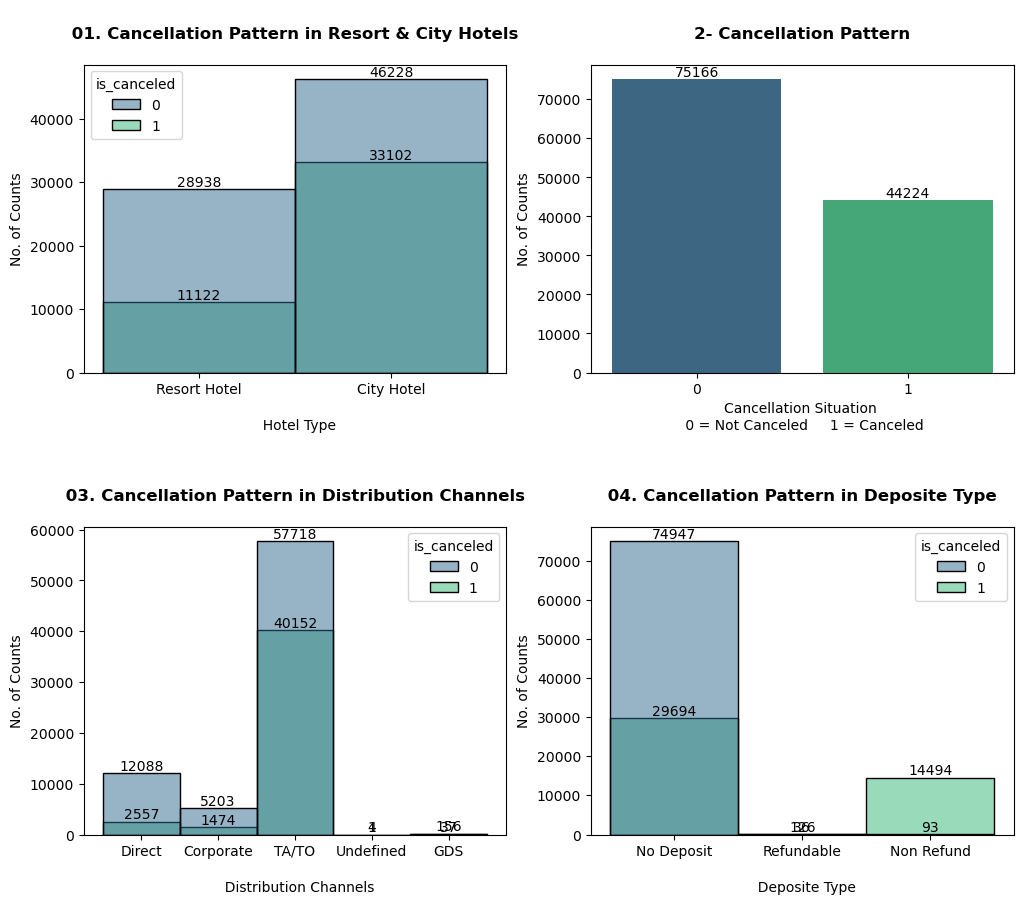

In [325]:
plt.figure (figsize = (12,10), facecolor = "white")

plt.subplot(2,2,1)
plt.title('\n 01. Cancellation Pattern in Resort & City Hotels \n',weight='bold')
ax=sns.histplot(data=df, x="hotel", hue="is_canceled",palette='viridis',bins=15)
# ax.bar_label(ax.containers[0])
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom',rotation=0, fontsize=10)
plt.xlabel('\n  Hotel Type', fontsize=10)
plt.ylabel('No. of Counts',fontsize=10)

plt.subplot(2,2,2)
plt.title('2- Cancellation Pattern\n',weight='bold')
# Corrected sns.countplot with 'data' parameter
ax = sns.countplot(data=df, x='is_canceled', palette='viridis')
ax.bar_label(ax.containers[0])
plt.xlabel('Cancellation Situation \n 0 = Not Canceled     1 = Canceled', fontsize=10)
plt.ylabel('No. of Counts', fontsize=10)
plt.xticks(rotation=0, ha='center')


plt.subplot(2,2,3)
plt.title(' 03. Cancellation Pattern in Distribution Channels \n',weight='bold')
ax=sns.histplot(data=df, x="distribution_channel", hue="is_canceled",palette='viridis',bins=15)
# ax.bar_label(ax.containers[0])
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom',rotation=0, fontsize=10)
plt.xlabel('\n  Distribution Channels', fontsize=10)
plt.ylabel('No. of Counts',fontsize=10)
    
plt.subplot(2,2,4)
plt.title(' 04. Cancellation Pattern in Deposite Type \n',weight='bold')
ax=sns.histplot(data=df, x="deposit_type", hue="is_canceled",palette='viridis',bins=15)
# ax.bar_label(ax.containers[0])
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom',rotation=0, fontsize=10)
plt.xlabel('\n  Deposite Type', fontsize=10)
plt.ylabel('No. of Counts',fontsize=10)

# plt.xticks(rotation=30, ha = 'right')
# plt.yticks(rotation=30, ha = 'right')
# 'best', 'upper right', 'upper left', 'lower left', 'lower right',
# 'right', 'center left', 'center right', 'lower center', 'upper center', 'center'


# Adjust the layout to increase the vertical space between rows
plt.subplots_adjust(hspace=0.5)  # Increase this value to create more space
plt.show()

''' Percentage of cancellations are Higher in City Hotels as compared to Resort Hotels'''

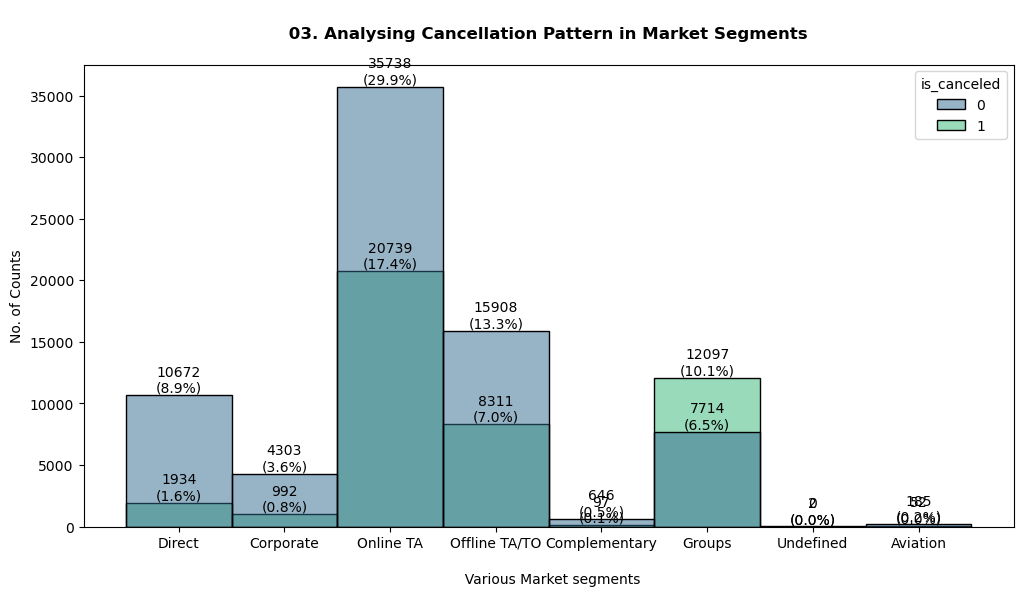

In [319]:
plt.figure (figsize = (12,6), facecolor = "white")

# plt.subplot(2,2,1)
plt.title('\n 03. Analysing Cancellation Pattern in Market Segments \n',weight='bold')
ax=sns.histplot(data=df, x="market_segment", hue="is_canceled",palette='viridis',bins=15)
# ax.bar_label(ax.containers[0])

# Calculate total counts
total_counts = df['market_segment'].value_counts().sum()

for p in ax.patches:
    height = p.get_height()
    percentage = f'{(height / total_counts) * 100:.1f}%' if total_counts > 0 else '0%'
    ax.annotate(f'{height}\n({percentage})',  # Show count and percentage
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', rotation=0, fontsize=10)
plt.xlabel('\n  Various Market segments', fontsize=10)
plt.ylabel('No. of Counts',fontsize=10)
plt.show()

===================== Meal Wise Distribution Of Customers ==================

In [169]:
df['meal'].value_counts()

meal
BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: count, dtype: int64

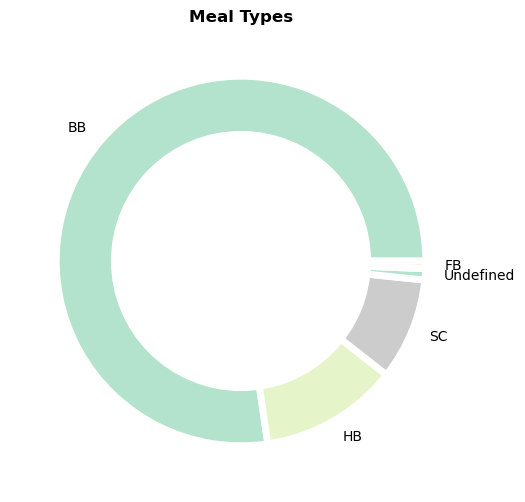

In [183]:
meal_labels= ['BB','HB', 'SC', 'Undefined', 'FB']
size = df['meal'].value_counts()
plt.figure(figsize=(6,6))
cmap =plt.get_cmap("Pastel2")
colors = cmap(np.arange(3)*4)
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=meal_labels, colors=colors, wedgeprops = { 'linewidth' : 5, 'edgecolor' : 'white' })
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Meal Types', weight='bold')
plt.show()

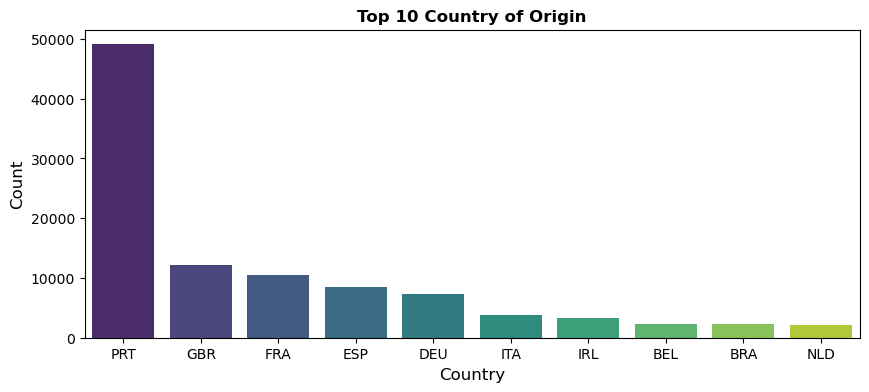

In [193]:
plt.figure(figsize=(10, 4))
top_10_values = df['country'].value_counts().nlargest(10).index
sns.countplot(x='country', data=df, order=top_10_values, palette="viridis")
plt.title('Top 10 Country of Origin', weight='bold')
plt.xlabel('Country', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

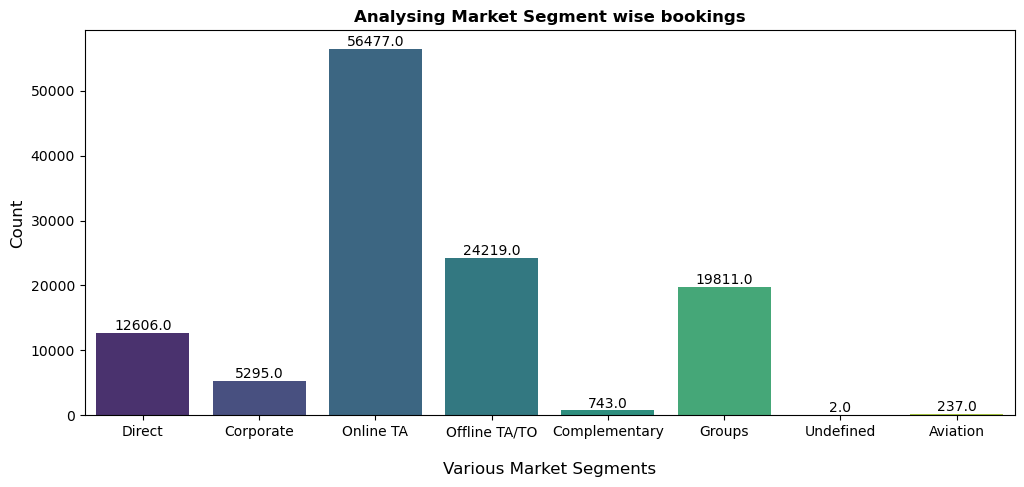

In [210]:
plt.figure(figsize=(12, 5))
ax=sns.countplot(x='market_segment', data=df,palette='viridis')  # Use 'data' instead of 'hotel_data'
plt.title('Analysing Market Segment wise bookings', weight='bold')
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom',rotation=0, fontsize=10)
plt.xlabel('\nVarious Market Segments', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

=========  Wattage of Distribution Channels in Booking ====================

In [260]:
df['distribution_channel'].value_counts()

distribution_channel
TA/TO        97870
Direct       14645
Corporate     6677
GDS            193
Undefined        5
Name: count, dtype: int64

Text(0, 0.5, 'No. of Counts')

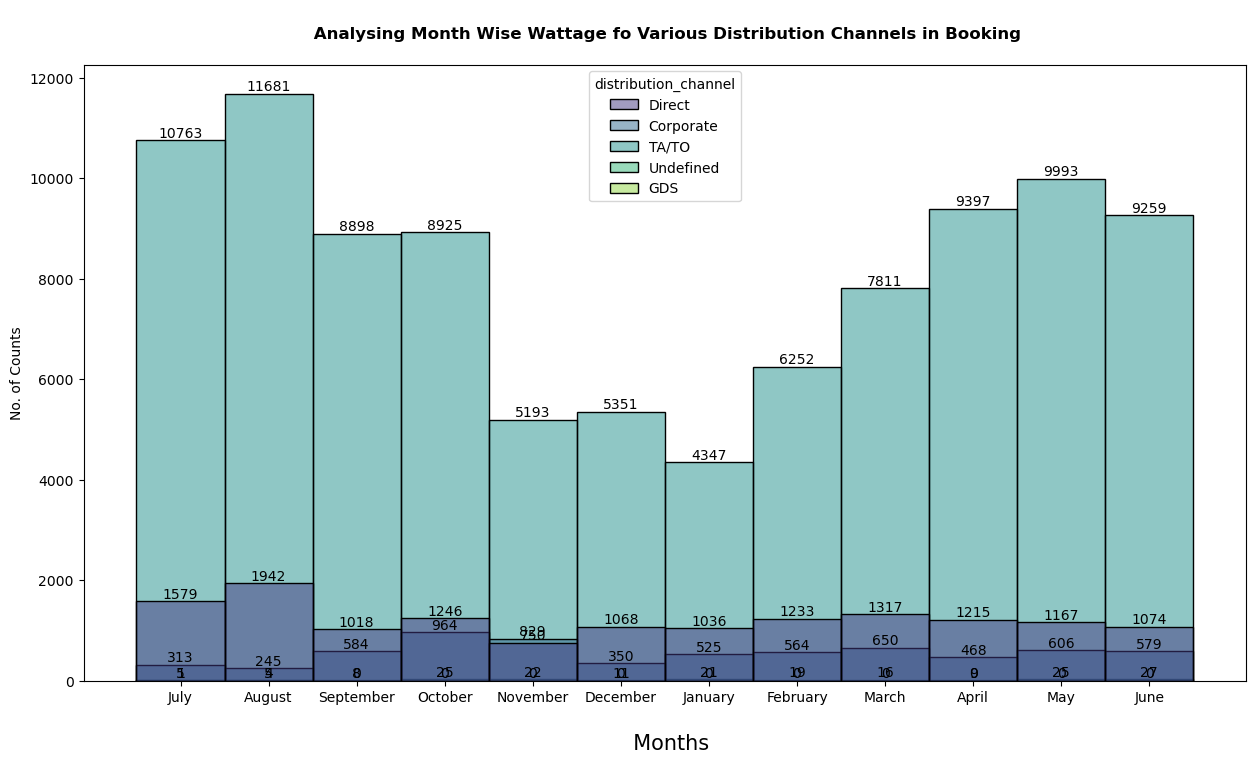

In [331]:
plt.figure (figsize = (15,8), facecolor = "white")

# plt.subplot(2,2,1)
plt.title('\n Analysing Month Wise Wattage fo Various Distribution Channels in Booking\n',weight='bold')
ax=sns.histplot(data=df, x="arrival_date_month", hue="distribution_channel",palette='viridis',bins=15)
# ax.bar_label(ax.containers[0])
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom',rotation=0, fontsize=10)
plt.xlabel('\n  Months', fontsize=15)
plt.ylabel('No. of Counts',fontsize=10)

=========== Applying Label Encoder ========

In [348]:
from sklearn.preprocessing import LabelEncoder
categorical_columns = ['hotel','is_canceled','arrival_date_year', 'arrival_date_month', 'meal', 'country', 'market_segment',
                       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
                       'deposit_type', 'customer_type', 'reservation_status']

# Create a LabelEncoder object
le = LabelEncoder()

# Apply label encoding to each categorical column
for column in categorical_columns:
  df[column] = le.fit_transform(df[column].astype(str))

In [338]:
# Converting 'children' column to integer type, 
df['children'] = df['children'].astype(int)

In [340]:
df['agent'] = df['agent'].astype(int)

In [350]:
df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,1,0,342,0,7,27,1,0,0,2,0,0,0,41,3,1,0,0,0,2,4,3,0,9,0,2,0.0,0,0,1
1,1,0,737,0,7,27,1,0,0,2,0,0,0,41,3,1,0,0,0,2,4,4,0,9,0,2,0.0,0,0,1
2,1,0,7,0,7,27,1,0,1,1,0,0,0,132,3,1,0,0,0,0,4,0,0,9,0,2,75.0,0,0,1
3,1,0,13,0,7,27,1,0,1,1,0,0,0,132,2,0,0,0,0,0,0,0,0,304,0,2,75.0,0,0,1
4,1,0,14,0,7,27,1,0,2,2,0,0,0,132,6,3,0,0,0,0,0,0,0,240,0,2,98.0,0,1,1


In [352]:
df.dtypes

hotel                               int32
is_canceled                         int32
lead_time                           int64
arrival_date_year                   int32
arrival_date_month                  int32
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                            int32
babies                              int64
meal                                int32
country                             int32
market_segment                      int32
distribution_channel                int32
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                  int32
assigned_room_type                  int32
booking_changes                     int64
deposit_type                        int32
agent                             

=======ALL NECESSARY DATA TYPE CHANGES DONE ==============

=================================================================================================================

## Model Building

========= Applying Train Test Split ===================

In [365]:
#  Applying TRAIN_TEST_SPLIT ====>>>
#  IMPORTING SOME IMPORTANT REQUIIRED LIBRARIES

In [367]:
from sklearn.model_selection import train_test_split

In [370]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [374]:
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report 

In [378]:
# Separating features (X) and target variable (y)
X = df.drop('is_canceled', axis=1)
y = df['is_canceled']

In [380]:
# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

## Logistic Regression

In [382]:
# Creating a logistic regression model
model = LogisticRegression(max_iter=1000)  # Increase max_iter if needed

In [384]:
# Training the model on the training data
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

==== Prediction On Training Data =======

In [386]:
# Make predictions on the validation set
y_val_pred = model.predict(X_val)

In [388]:
# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", val_accuracy)
print(classification_report(y_val, y_val_pred))

Validation Accuracy: 0.9894460576278759
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     11204
           1       1.00      0.97      0.99      6704

    accuracy                           0.99     17908
   macro avg       0.99      0.99      0.99     17908
weighted avg       0.99      0.99      0.99     17908



==== Prediction On Testing Data =======

In [390]:
# Make predictions on the test set (for final evaluation)
y_test_pred = model.predict(X_test)

In [392]:
# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)
print(classification_report(y_test, y_test_pred))

Test Accuracy: 0.9892791333966162
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     11274
           1       1.00      0.97      0.99      6635

    accuracy                           0.99     17909
   macro avg       0.99      0.99      0.99     17909
weighted avg       0.99      0.99      0.99     17909



In [400]:
# maxaccu = 0
# maxrs = 0

# for i in range(1,200):
#     x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=i)
#     rfc = RandomForestClassifier()
#     rfc.fit(x_train,y_train)
#     pred = rfc.predict(x_test)
#     acc = accuracy_score(y_test,pred)
    
#     if acc > maxaccu :
#         maxaccu = acc
#         maxrs = i
        
# print ("Best accuracy is",maxaccu, "at random state", maxrs)
# print ("with Best Fitted Model is :",rfc)

## Random Forest Classifier

In [437]:
rfc = RandomForestClassifier()

In [427]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [429]:
x_train.shape

(95512, 29)

In [431]:
y_train.shape

(95512,)

In [433]:
# Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train, y_train)
rf_y_pred = rf_model.predict(x_test)
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print("Random Forest Validation Accuracy:", rf_accuracy)
# print(accuracy_score(y_test,final_model_pred))
# print(confusion_matrix(y_test,final_model_pred))
# print(classification_report(y_test,final_model_pred))

Random Forest Validation Accuracy: 1.0


In [435]:
print(accuracy_score(y_test,rf_y_pred))
print(confusion_matrix(y_test,rf_y_pred))
print(classification_report(y_test,rf_y_pred))

1.0
[[14907     0]
 [    0  8971]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14907
           1       1.00      1.00      1.00      8971

    accuracy                           1.00     23878
   macro avg       1.00      1.00      1.00     23878
weighted avg       1.00      1.00      1.00     23878



==================================================================================================================